In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv", low_memory=False )

In [3]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [5]:
# Define the list of columns to keep
columns_to_keep = [
    'Created Date', 'Closed Date', 'Agency Name',
    'Complaint Type', 'Descriptor', 'Incident Zip',
    'Facility Type', 'Status', 'Borough', 'Resolution Description',
    'Community Board', 'Latitude', 'Longitude'
]

# Keep only those columns in the DataFrame
df = df[columns_to_keep]


In [6]:
df['Created Date'] = pd.to_datetime(df['Created Date'], format='%m/%d/%Y %I:%M:%S %p')
df['Closed Date'] = pd.to_datetime(df['Closed Date'], format='%m/%d/%Y %I:%M:%S %p')

In [7]:
df.dropna(subset=['Complaint Type', 'Created Date', 'Closed Date'], inplace=True)

In [8]:
df['Request Duration (Hours)'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds() / 3600

In [9]:
df.shape

(362177, 14)

In [10]:
df['Year'] = df['Created Date'].dt.year
df['Month'] = df['Created Date'].dt.month
df['Day'] = df['Created Date'].dt.day
df['Hour'] = df['Created Date'].dt.hour
df['Weekday'] = df['Created Date'].dt.day_name()

In [11]:
df.head()

,Created Date,Closed Date,Agency Name,Complaint Type,Descriptor,Incident Zip,Facility Type,Status,Borough,Resolution Description,Community Board,Latitude,Longitude,Request Duration (Hours),Year,Month,Day,Hour,Weekday
0,2015-12-31 23:59:45,2016-01-01 00:55:15,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,10034.0,Precinct,Closed,MANHATTAN,The Police Department responded and upon arriv...,12 MANHATTAN,40.865682,-73.923501,0.925000,2015,12,31,23,Thursday
1,2015-12-31 23:59:44,2016-01-01 01:26:57,New York City Police Department,Blocked Driveway,No Access,11105.0,Precinct,Closed,QUEENS,The Police Department responded to the complai...,01 QUEENS,40.775945,-73.915094,1.453611,2015,12,31,23,Thursday
2,2015-12-31 23:59:29,2016-01-01 04:51:03,New York City Police Department,Blocked Driveway,No Access,10458.0,Precinct,Closed,BRONX,The Police Department responded and upon arriv...,07 BRONX,40.870325,-73.888525,4.859444,2015,12,31,23,Thursday
3,2015-12-31 23:57:46,2016-01-01 07:43:13,New York City Police Department,Illegal Parking,Commercial Overnight Parking,10461.0,Precinct,Closed,BRONX,The Police Department responded to the complai...,10 BRONX,40.835994,-73.828379,7.757500,2015,12,31,23,Thursday
4,2015-12-31 23:56:58,2016-01-01 03:24:42,New York City Police Department,Illegal Parking,Blocked Sidewalk,11373.0,Precinct,Closed,QUEENS,The Police Department responded and upon arriv...,04 QUEENS,40.733060,-73.874170,3.462222,2015,12,31,23,Thursday


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 362177 entries, 0 to 364557
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Created Date              362177 non-null  datetime64[ns]
 1   Closed Date               362177 non-null  datetime64[ns]
 2   Agency Name               362177 non-null  object        
 3   Complaint Type            362177 non-null  object        
 4   Descriptor                355681 non-null  object        
 5   Incident Zip              361502 non-null  float64       
 6   Facility Type             362159 non-null  object        
 7   Status                    362177 non-null  object        
 8   Borough                   362177 non-null  object        
 9   Resolution Description    362177 non-null  object        
 10  Community Board           362177 non-null  object        
 11  Latitude                  360470 non-null  float64       
 12  Longitu

In [13]:
def categorize_duration(hours):
    if hours < 1:
        return 'Fast'
    elif hours < 5:
        return 'Moderate'
    elif hours < 24:
        return 'Slow'
    else:
        return 'Delayed'

df['Response Speed'] = df['Request Duration (Hours)'].apply(categorize_duration)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 362177 entries, 0 to 364557
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Created Date              362177 non-null  datetime64[ns]
 1   Closed Date               362177 non-null  datetime64[ns]
 2   Agency Name               362177 non-null  object        
 3   Complaint Type            362177 non-null  object        
 4   Descriptor                355681 non-null  object        
 5   Incident Zip              361502 non-null  float64       
 6   Facility Type             362159 non-null  object        
 7   Status                    362177 non-null  object        
 8   Borough                   362177 non-null  object        
 9   Resolution Description    362177 non-null  object        
 10  Community Board           362177 non-null  object        
 11  Latitude                  360470 non-null  float64       
 12  Longitu

In [15]:
# Top 10 most frequent complaint types
top_complaints = df['Complaint Type'].value_counts().head(10)
print(top_complaints)

Complaint Type
Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: count, dtype: int64


In [16]:
df.drop(['Created Date', 'Closed Date'], axis=1, inplace=True)

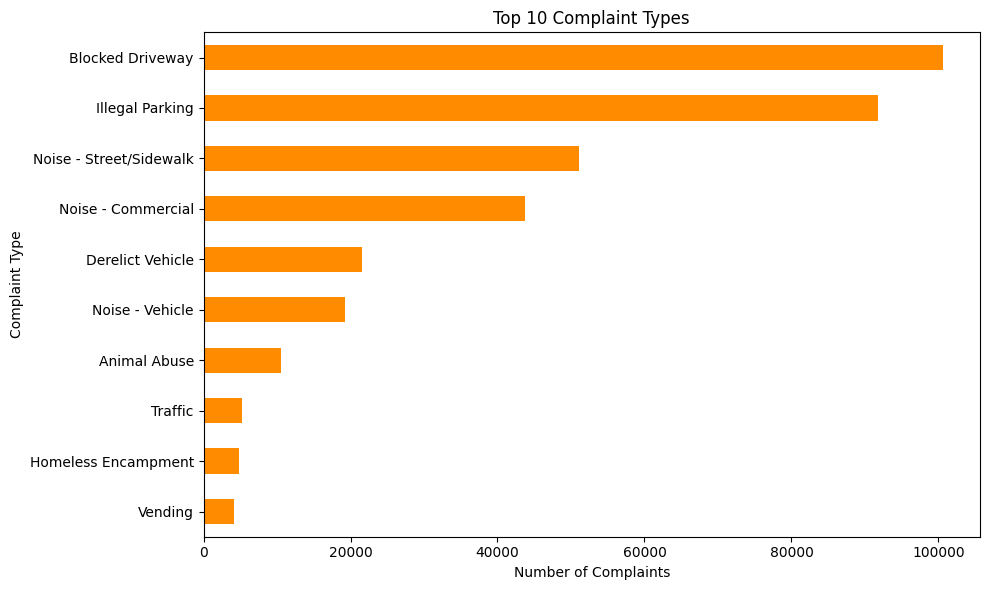

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
top_complaints.plot(kind='barh', color='darkorange')
plt.xlabel('Number of Complaints')
plt.title('Top 10 Complaint Types')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [18]:
top_agencies = df['Agency Name'].value_counts().head(10)
print(top_agencies)

Agency Name
New York City Police Department    362168
Internal Affairs Bureau                 8
NYPD                                    1
Name: count, dtype: int64


In [19]:
# Checking general distribution
df['Request Duration (Hours)'].describe()

count    362177.000000
mean          4.198139
std           5.861819
min           0.016944
25%           1.259167
50%           2.671111
75%           5.243889
max         592.872778
Name: Request Duration (Hours), dtype: float64

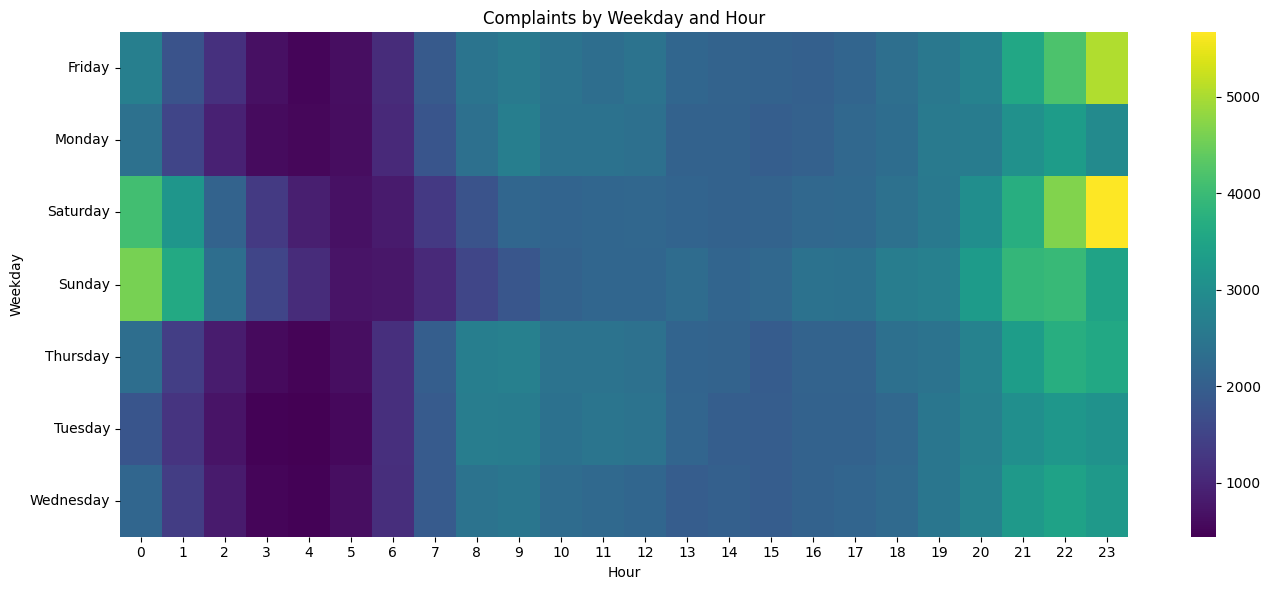

In [20]:
import seaborn as sns
pivot_table = df.pivot_table(index='Weekday', columns ='Hour', values='Complaint Type', aggfunc='count')

plt.figure(figsize=(14,6))
sns.heatmap(pivot_table, cmap ='viridis')
plt.title('Complaints by Weekday and Hour')
plt.tight_layout()
plt.show()

C:\Users\ASHAD\AppData\Local\Temp\ipykernel_13824\3351718265.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_complaints.values, y=top_complaints.index,palette = 'viridis')


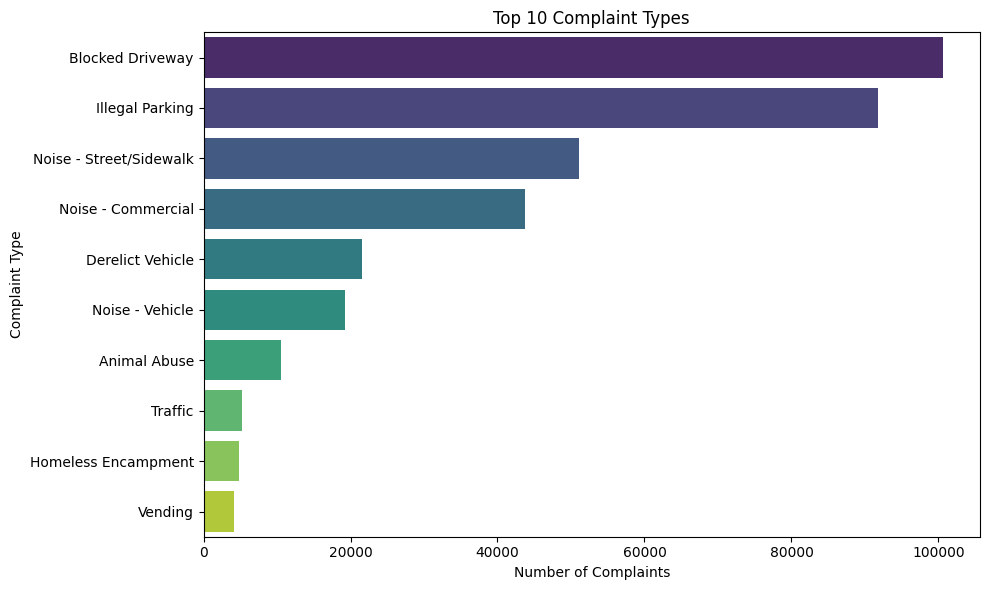

In [21]:
top_complaints = df['Complaint Type'].value_counts().head(10)
plt.figure(figsize = (10,6))
sns.barplot(x=top_complaints.values, y=top_complaints.index,palette = 'viridis')
plt.title('Top 10 Complaint Types')
plt.xlabel('Number of Complaints')
plt.ylabel('Complaint Type')
plt.tight_layout()
plt.show()

C:\Users\ASHAD\AppData\Local\Temp\ipykernel_13824\4148234146.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agency_counts.values, y=agency_counts.index, palette='mako')


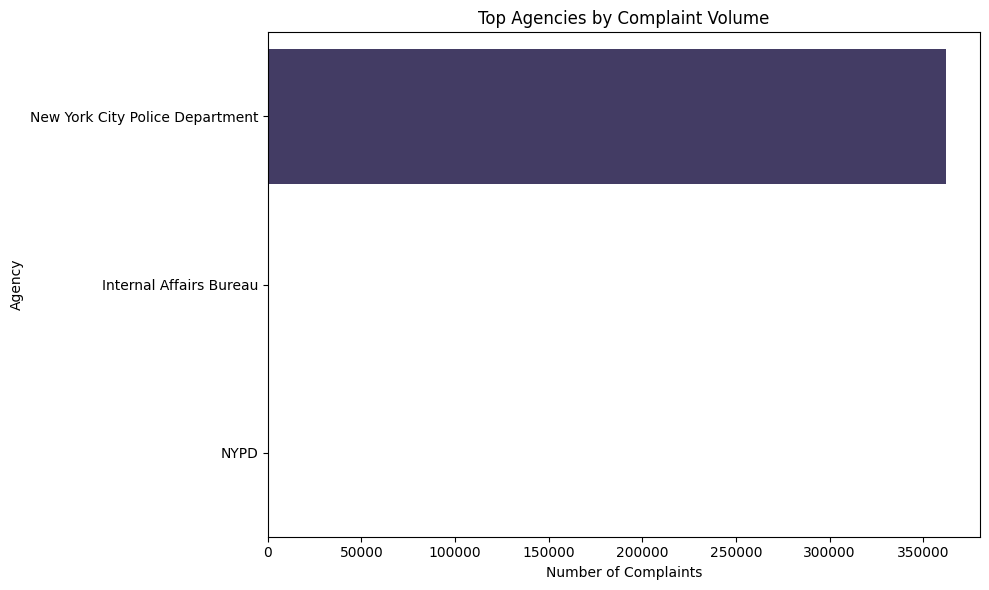

In [22]:
agency_counts = df['Agency Name'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=agency_counts.values, y=agency_counts.index, palette='mako')
plt.title('Top Agencies by Complaint Volume')
plt.xlabel('Number of Complaints')
plt.ylabel('Agency')
plt.tight_layout()
plt.show()

C:\Users\ASHAD\AppData\Local\Temp\ipykernel_13824\4104507398.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Hour', palette='cubehelix')


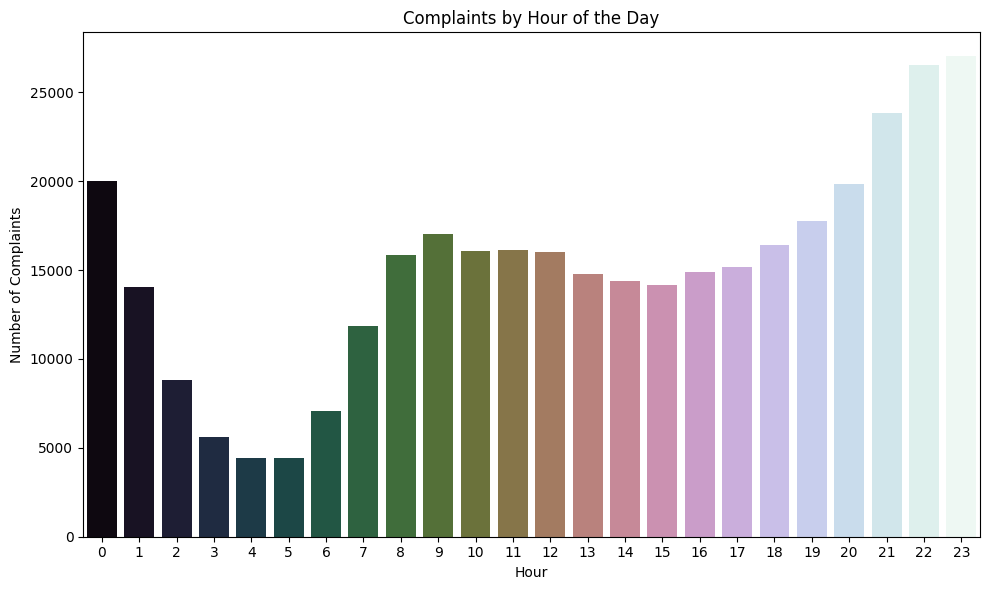

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Hour', palette='cubehelix')
plt.title('Complaints by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Complaints')
plt.tight_layout()
plt.show()

C:\Users\ASHAD\AppData\Local\Temp\ipykernel_13824\316830699.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Response Speed', order=df['Response Speed'].value_counts().index, palette='Set2')


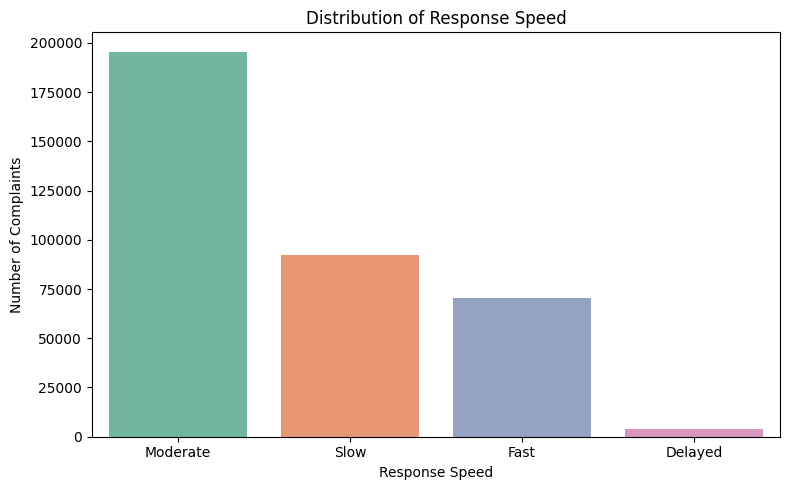

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Response Speed', order=df['Response Speed'].value_counts().index, palette='Set2')
plt.title('Distribution of Response Speed')
plt.xlabel('Response Speed')
plt.ylabel('Number of Complaints')
plt.tight_layout()
plt.show()

In [25]:
df.to_csv('Cleaned_311_Complaints.csv', index=False, sep=',', encoding='utf-8')

In [26]:
df_agency = df['Agency Name'].value_counts().reset_index()
df_agency.columns = ['Agency Name', 'Complaint Count']
df_agency.to_csv('Complaints_by_Agency.csv', index=False, sep=',', encoding='utf-8')
df_type = df['Complaint Type'].value_counts().reset_index()
df_type.columns = ['Complaint Type', 'Count']
df_type.to_csv('Complaints_by_Type.csv', index=False, sep=',', encoding='utf-8')
df_borough = df['Borough'].value_counts().reset_index()
df_borough.columns = ['Borough', 'Complaint Count']
df_borough.to_csv('Complaints_by_Borough.csv', index=False, sep=',', encoding='utf-8')
df_speed = df['Response Speed'].value_counts().reset_index()
df_speed.columns = ['Response Speed', 'Count']
df_speed.to_csv('Response_Speed_Distribution.csv', index=False, sep=',', encoding='utf-8')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 362177 entries, 0 to 364557
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Agency Name               362177 non-null  object 
 1   Complaint Type            362177 non-null  object 
 2   Descriptor                355681 non-null  object 
 3   Incident Zip              361502 non-null  float64
 4   Facility Type             362159 non-null  object 
 5   Status                    362177 non-null  object 
 6   Borough                   362177 non-null  object 
 7   Resolution Description    362177 non-null  object 
 8   Community Board           362177 non-null  object 
 9   Latitude                  360470 non-null  float64
 10  Longitude                 360470 non-null  float64
 11  Request Duration (Hours)  362177 non-null  float64
 12  Year                      362177 non-null  int32  
 13  Month                     362177 non-null  int32 

In [28]:
df_new = df.head(20)

In [29]:
df_new.to_csv('Sample_Cleaned_311_Complaints.csv', index=False, sep=',', encoding='utf-8')

,Agency Name,Complaint Type,Descriptor,Incident Zip,Facility Type,Status,Borough,Resolution Description,Community Board,Latitude,Longitude,Request Duration (Hours),Year,Month,Day,Hour,Weekday,Response Speed
0,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,10034.0,Precinct,Closed,MANHATTAN,The Police Department responded and upon arriv...,12 MANHATTAN,40.865682,-73.923501,0.925000,2015,12,31,23,Thursday,Fast
1,New York City Police Department,Blocked Driveway,No Access,11105.0,Precinct,Closed,QUEENS,The Police Department responded to the complai...,01 QUEENS,40.775945,-73.915094,1.453611,2015,12,31,23,Thursday,Moderate
2,New York City Police Department,Blocked Driveway,No Access,10458.0,Precinct,Closed,BRONX,The Police Department responded and upon arriv...,07 BRONX,40.870325,-73.888525,4.859444,2015,12,31,23,Thursday,Moderate
3,New York City Police Department,Illegal Parking,Commercial Overnight Parking,10461.0,Precinct,Closed,BRONX,The Police Department responded to the complai...,10 BRONX,40.835994,-73.828379,7.757500,2015,12,31,23,Thursday,Slow
4,New York City Police Department,Illegal Parking,Blocked Sidewalk,11373.0,Precinct,Closed,QUEENS,The Police Department responded and upon arriv...,04 QUEENS,40.733060,-73.874170,3.462222,2015,12,31,23,Thursday,Moderate
5,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,11215.0,Precinct,Closed,BROOKLYN,The Police Department responded and upon arriv...,07 BROOKLYN,40.660823,-73.992568,1.894722,2015,12,31,23,Thursday,Moderate
6,New York City Police Department,Illegal Parking,Blocked Hydrant,10032.0,Precinct,Closed,MANHATTAN,The Police Department issued a summons in resp...,12 MANHATTAN,40.840848,-73.937375,1.972778,2015,12,31,23,Thursday,Moderate
7,New York City Police Department,Blocked Driveway,No Access,10457.0,Precinct,Closed,BRONX,The Police Department responded to the complai...,03 BRONX,40.837503,-73.902905,1.813611,2015,12,31,23,Thursday,Moderate
8,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,11415.0,Precinct,Closed,QUEENS,The Police Department responded to the complai...,09 QUEENS,40.704977,-73.832605,8.559444,2015,12,31,23,Thursday,Slow
9,New York City Police Department,Blocked Driveway,No Access,11219.0,Precinct,Closed,BROOKLYN,The Police Department responded and upon arriv...,11 BROOKLYN,40.623793,-73.999539,1.395000,2015,12,31,23,Thursday,Moderate
